In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.random.set_seed(1)

In [ ]:
# Parameter Initialization for TF

def initialize_parameters_tf(layer_dims):
    parameters = {}
    L = len(layer_dims)
    for l in range(1, L):
        parameters["W" + str(l)] = tf.Variable(tf.random.normal([layer_dims[l], layer_dims[l-1]], stddev=0.01))
        parameters["b" + str(l)] = tf.Variable(tf.zeros([layer_dims[l], 1]))
    return parameters

In [ ]:
# Linear Forward using tf.einsum

def linear_forward_tf(A_prev, W, b):
    Z = tf.einsum('ij,jk->ik', W, A_prev) + b  # Using einsum instead of matmul
    return Z

def linear_activation_forward_tf(A_prev, W, b, activation):
    Z = linear_forward_tf(A_prev, W, b)
    if activation == "relu":
        A = tf.nn.relu(Z)
    elif activation == "sigmoid":
        A = tf.nn.sigmoid(Z)
    return A

def L_model_forward_tf(X, parameters):
    A = X
    L = len(parameters) // 2
    for l in range(1, L):
        A = linear_activation_forward_tf(A, parameters["W"+str(l)], parameters["b"+str(l)], activation="relu")
    AL = linear_activation_forward_tf(A, parameters["W"+str(L)], parameters["b"+str(L)], activation="sigmoid")
    return AL

In [ ]:
# ----------------------------
# Example Run for TF Low-Level Version
# ----------------------------
layer_dims = [3, 5, 4, 1]
parameters_tf = initialize_parameters_tf(layer_dims)
X_tf = tf.random.uniform((3, 209), -1, 1)
Y_tf = tf.sin(np.pi * X_tf[0, :]) + tf.math.log(tf.abs(X_tf[1, :]) + 1) + X_tf[2, :]**2
Y_tf = tf.reshape(Y_tf, (1, 209))
AL_tf = L_model_forward_tf(X_tf, parameters_tf)
cost_tf = -tf.reduce_mean(Y_tf * tf.math.log(AL_tf) + (1-Y_tf) * tf.math.log(1-AL_tf))
print("TF Low-Level Cost:", cost_tf.numpy())

TF Low-Level Cost: 0.6931473


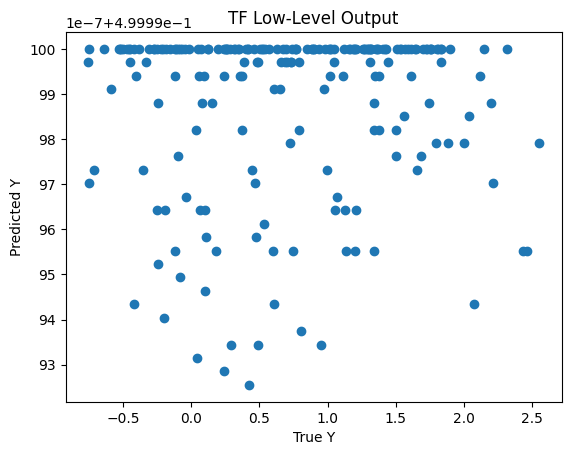

In [ ]:
# Optional: plot predicted vs. true values
plt.plot(Y_tf.numpy().flatten(), AL_tf.numpy().flatten(), 'o')
plt.xlabel("True Y")
plt.ylabel("Predicted Y")
plt.title("TF Low-Level Output")
plt.show()